<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

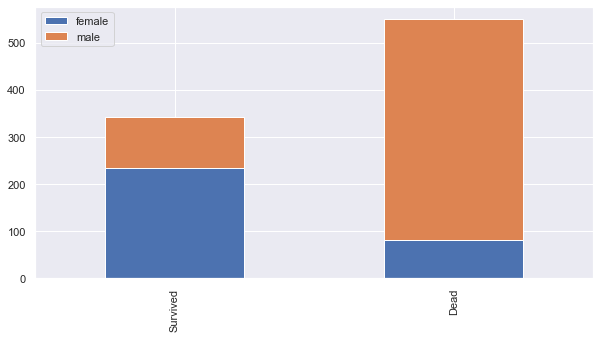

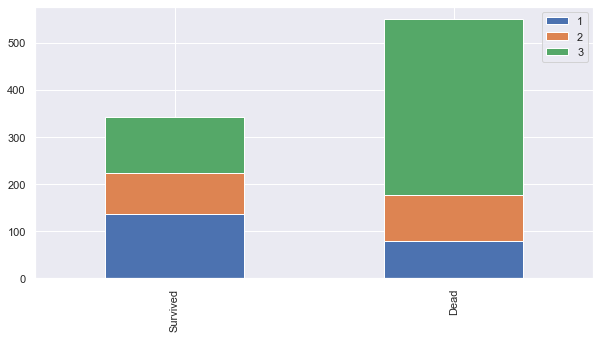

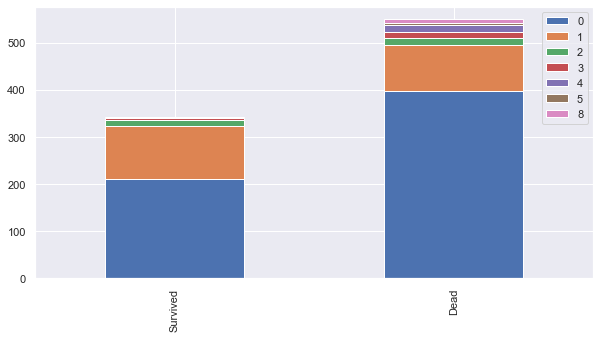

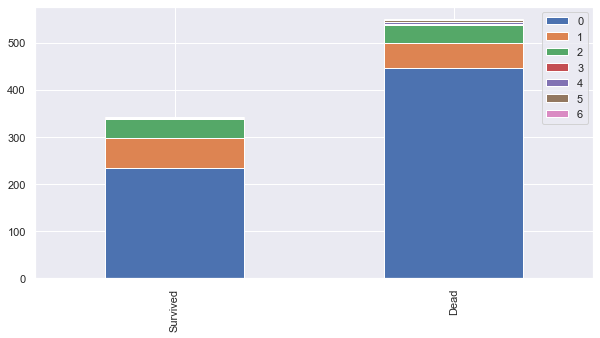

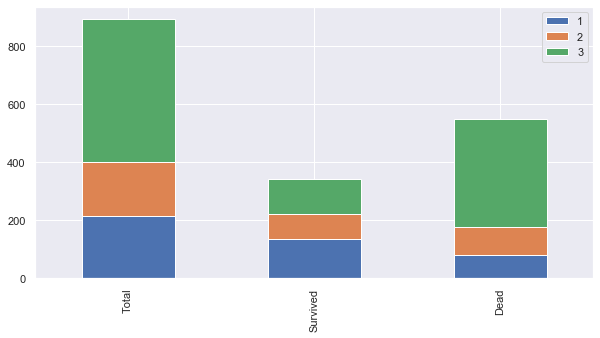

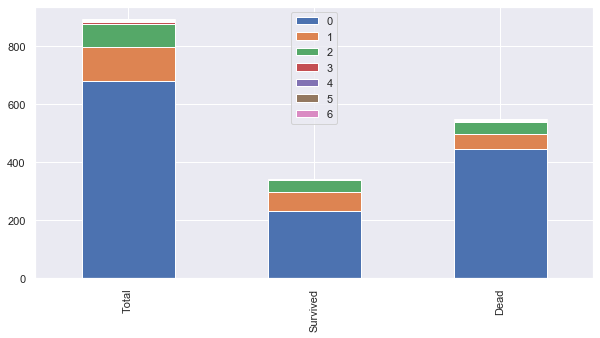

In [1]:
# We need to import the "pandas" package to read csv files and much more functionalities
import pandas as pd

train = pd.read_csv('C:/Anaconda3/train.csv')
test = pd.read_csv('C:/Anaconda3/test.csv')

# Informations of train DF row 1-5
# train.head(5)

# Row-Columns of train and test Data Frame
train.shape
test.shape

# Details of train and test table
train.info()
test.info()

# To know how many fields are empty in train and test DF
train.isnull().sum()
test.isnull().sum()

# matplotlib.pyplot লাইব্রেরি দেয় আমাদের ম্যাটল্যাবের মতো চমৎকার প্লটিং ফ্রেমওয়ার্ক। 
# ছবিগুলো জুপিটার নোটবুকে একসাথে দেখানোর জন্য inline মোড নিয়ে আসা হয়েছে। 
# seaborn হচ্ছে পাইথনের matplotlib ভিত্তিক স্ট্যাটিসটিকাল গ্রাফিক্যাল লাইব্রেরি।
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# making a function to display the survival and dead ratio for all variables 
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

# Checking bar charts of different variables
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('SibSp')
bar_chart("Parch")

# making another function which compares survival and dead ration with total passengers
def bar_chart(feature):
    total = train[train['Survived'] >= 0][feature].value_counts()
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([total, survived, dead])
    df.index = ['Total', 'Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

bar_chart('Pclass')
bar_chart('Parch')

In [2]:
# Making a Title variable for both datasets
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
    
train['Title'].value_counts()    

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Sir           1
Don           1
Countess      1
Ms            1
Lady          1
Jonkheer      1
Capt          1
Name: Title, dtype: int64

In [3]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [4]:
# Mapping the datasets in Mr, Mrs, Miss and Other catagory
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [5]:
print(train.shape)
test.shape

(891, 13)


(418, 12)

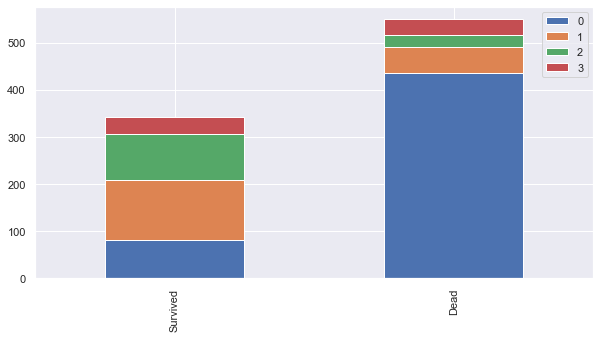

In [6]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))
bar_chart('Title')

In [7]:
sex_mapping = {'male': 0, 'female': 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


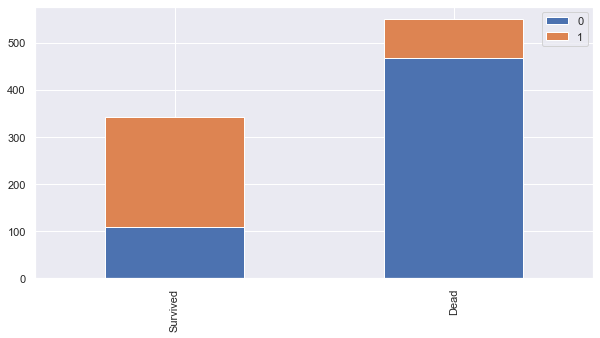

In [9]:
bar_chart('Sex')